# Analysis of Geiger counter data collected using Phyphox "Timers / Acoustic stopwatch / Many" functionality

In [1]:
# You will need to use launch "Python 3 user modules" to be able to load excel spreadsheets
%pip install --quiet --user xlrd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

Note: you may need to restart the kernel to use updated packages.


In [2]:
ss_df = pd.read_excel("Acoustic Stopwatch 2024-05-26 10-06-14_with_salt_sub_nearby.xls", sheet_name="All")
ss_df

,Event time (s),Interval (s)
0,3.992792,1.857521
1,5.850313,0.100021
2,5.950333,5.009042
3,10.959375,0.124937
4,11.084312,0.716125
...,...,...
973,2157.011000,2.811083
974,2159.822083,0.702896
975,2160.524979,3.278583
976,2163.803563,0.376437


In [3]:
ss_times_raw = ss_df.to_numpy()[:,0]  # convert to numpy to make easier to work with
ss_times = np.array([v for v in ss_times_raw if v >= 200 and v <= 200+1800])  # get rid of data at start and end
bins = np.array(np.arange(200, 2000, 1))  # create 1 second long bins for histograming
counts_in_bins, bin_edges = np.histogram(ss_times, bins=bins)

<BarContainer object of 1799 artists>

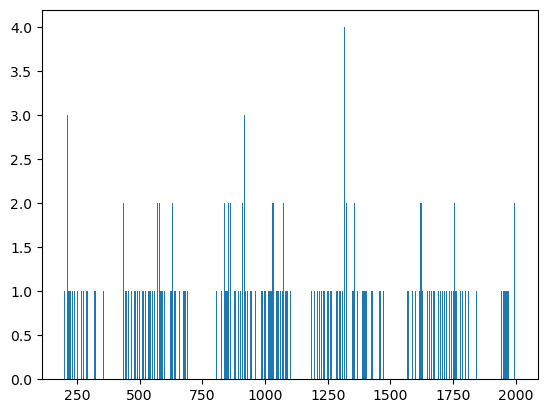

In [4]:
plt.bar(bin_edges[:-1], counts_in_bins)

In retrospect, this data looks a bit concerning --- it is as if counts are coming in bursts.  I need to investigate further.

(array([0.62145636, 0.31573096, 0.05558644, 0.00611451, 0.00111173,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <BarContainer object of 11 artists>)

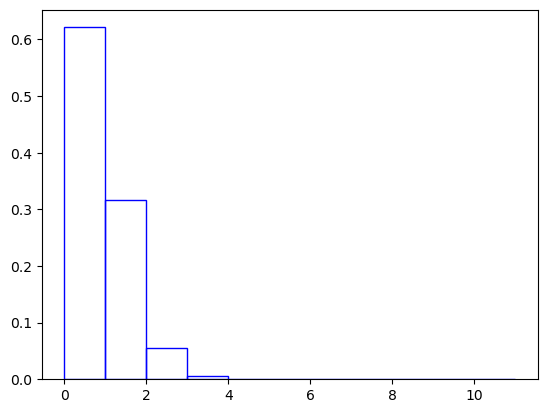

In [5]:
plt.hist(counts_in_bins, bins=range(0, 12), fill=None, edgecolor="blue", density=True)

Now let's do the same analysis with the background data

In [6]:
back_df = pd.read_excel("Acoustic Stopwatch 2024-05-26 11-36-18_without_salt_sub_nearby.xls", sheet_name="All")    

In [7]:
back_times_raw = back_df.to_numpy()[:,0]

In [8]:
back_times = np.array([v for v in back_times_raw if v >= 200 and v <= 200+1800])

In [9]:
back_counts_in_bins, back_bin_edges = np.histogram(back_times, bins=bins)

AttributeError: module 'matplotlib.pyplot' has no attribute 'save_fig'

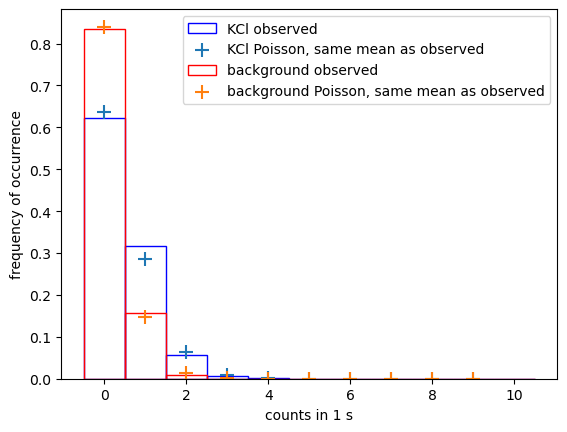

In [18]:
def p(mean):  # create a function to evaluate Poisson distribution
    def f(r):
        return 1/math.factorial(r) * mean**r * np.exp(-mean)
    return f
ns = list(range(0,10))

plt.hist(counts_in_bins, bins=np.arange(-0.5, 11.5), fill=None, edgecolor="blue", density=True, label="KCl observed")
plt.scatter(ns, [p(np.mean(counts_in_bins))(n) for n in ns], marker="+", s=100, label="KCl Poisson, same mean as observed")

plt.hist(back_counts_in_bins, bins=np.arange(-0.5, 11.5), fill=None, edgecolor="red", density=True, label="background observed")
plt.scatter(ns, [p(np.mean(back_counts_in_bins))(n) for n in ns], marker="+", s=100, label="background Poisson, same mean as observed")

ax = plt.gca()
ax.legend()
ax.set_xlabel("counts in 1 s")
ax.set_ylabel("frequency of occurrence")
plt.savefig("geiger_20240525_generated.pdf")

Agreement between the experimental observations and theoretical distributions appears good.

In [11]:
# For a Poisson distribution, the mean and variance are equal.  
# Let's check how close our sample satisfies this equality:
print(np.mean(counts_in_bins), np.std(counts_in_bins)**2)
print(np.mean(back_counts_in_bins), np.std(back_counts_in_bins)**2)

0.44969427459699834 0.4086700010289207
0.17398554752640355 0.16039050785115933


Next lecture we will derive the Poisson distribution.